Task: 
load the „pattern_X.tif” 8×8 image. 
Convert to grayscale only if it is needed. 
Compute the result when the pattern is convolved with each of the masks (a) to (d) shown. Pad the image with zeroes.

In [27]:
from  PIL import Image
import matplotlib.pyplot as plt
import numpy as np

pattern = Image.open('./pattern_h.tif').convert("L")

mask_a = np.array([
    [-1, -1, 0], 
    [-1, 0, 1], 
    [0, 1, 1]
    ])

mask_b = np.array([
    [0, -1, -1], 
    [1, 0, -1], 
    [1, 1, 1]
    ])

mask_d = np.array([
    [-1, -1, -1], 
    [-1, 8, -1], 
    [-1, -1, -1]
    ])

mask_c = mask_d * -1



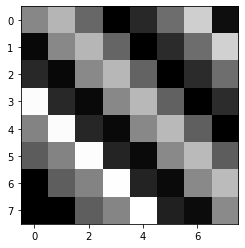

In [28]:
plt.figure()
plt.imshow(pattern, 'gray')

In [29]:
pattern_array = np.array(pattern)
pattern_array

array([[129, 173,  99,   0,  39, 104, 198,  14],
       [  8, 130, 174,  97,   0,  41, 104, 200],
       [ 40,   8, 131, 175,  95,   0,  41, 105],
       [241,  39,   9, 130, 176,  93,   0,  42],
       [125, 241,  37,   9, 130, 177,  91,   0],
       [ 88, 126, 242,  35,  10, 131, 178,  89],
       [  0,  90, 126, 243,  34,  10, 131, 179],
       [  0,   0,  90, 127, 244,  32,  11, 132]], dtype=uint8)

In [30]:
zero_padded_pattern = np.pad(pattern_array, (1,), mode='constant')
zero_padded_pattern

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 129, 173,  99,   0,  39, 104, 198,  14,   0],
       [  0,   8, 130, 174,  97,   0,  41, 104, 200,   0],
       [  0,  40,   8, 131, 175,  95,   0,  41, 105,   0],
       [  0, 241,  39,   9, 130, 176,  93,   0,  42,   0],
       [  0, 125, 241,  37,   9, 130, 177,  91,   0,   0],
       [  0,  88, 126, 242,  35,  10, 131, 178,  89,   0],
       [  0,   0,  90, 126, 243,  34,  10, 131, 179,   0],
       [  0,   0,   0,  90, 127, 244,  32,  11, 132,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [94]:
def get_masked_value(arr, mask):
    result = 0
    
    for i, row in enumerate(arr):
        for j, val in enumerate(row):    
            result = result + mask[i][j] * val
    return np.uint8(result / 9)

In [100]:
get_masked_value(zero_padded_pattern[0:3, 0:3], mask_a)

34

In [107]:
def create_masked_pattern(arr, mask):
    masked = arr.copy()
    for i in range(1, len(arr)-1):
        for j in range(1, len(arr)-1):
            masked[i][j] = get_masked_value(arr[i:i+3, j:j+3], mask)
    return masked

In [113]:
a_masked_pattern = create_masked_pattern(zero_padded_pattern, mask_a)
b_masked_pattern = create_masked_pattern(zero_padded_pattern, mask_b)
c_masked_pattern = create_masked_pattern(zero_padded_pattern, mask_c)
d_masked_pattern = create_masked_pattern(zero_padded_pattern, mask_d)


Text(0.5, 1.0, 'Mask D')

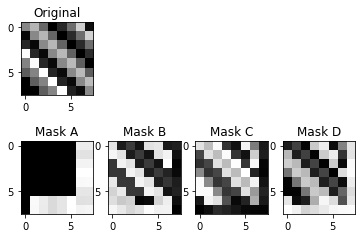

In [117]:
plt.subplot(2,4,1)
plt.imshow(pattern, 'gray')
plt.title('Original')

plt.subplot(2,4,5)
plt.imshow(a_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask A')

plt.subplot(2,4,6)
plt.imshow(b_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask B')

plt.subplot(2,4,7)
plt.imshow(c_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask C')

plt.subplot(2,4,8)
plt.imshow(d_masked_pattern[1:9,1:9], 'gray')
plt.title('Mask D')